In [1]:
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("fake-news/train.csv")

In [4]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
X = df.iloc[:, :-1]

In [6]:
y = df.iloc[:,-1]

In [7]:
df.shape

(20800, 5)

In [8]:
df = df.dropna()

In [9]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
messages = df.copy()

In [11]:
messages = messages.reset_index()

In [12]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [14]:
from nltk.stem.porter import PorterStemmer

In [15]:
ps = PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus[3]

'civilian kill singl us airstrik identifi'

###  CountVectorizer

In [17]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(18285, 5000)

In [19]:
y = messages['label']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=0)

In [21]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [22]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [23]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [24]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Term Frequency Inverse Document Frequency

In [25]:
tf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X_tf = tf.fit_transform(corpus).toarray()

In [26]:
y_tf = y

In [27]:
from sklearn.model_selection import train_test_split
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf,y_tf,test_size = 0.33, random_state=0)

### Confusion Matrix

In [28]:
import matplotlib.pyplot as plt

In [29]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment='center', 
                color = "white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

### MultinomialNB Algorithm

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools

In [31]:
classifier = MultinomialNB()

#### Metrics for Count Vectorizer

Accuracy :  0.9010770505385253
Confusion matrix without normalization


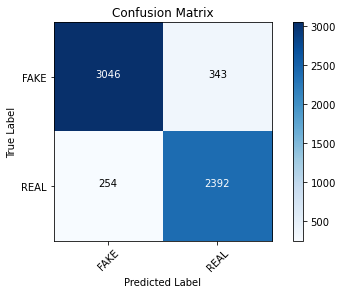

In [32]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy : ", score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ["FAKE", "REAL"])

#### Metrics for TFIDFVectorizer

Accuracy :  0.8795360397680199
Confusion matrix without normalization


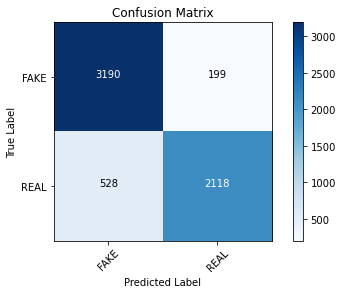

In [33]:
classifier.fit(X_train_tf, y_train_tf)
pred = classifier.predict(X_test_tf)
score = metrics.accuracy_score(y_test_tf, pred)
print("Accuracy : ", score)
cm = metrics.confusion_matrix(y_test_tf, pred)
plot_confusion_matrix(cm, classes = ["FAKE", "REAL"])

### Passive Agressive Classification Algorithm

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [35]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

#### Metrics for Count Vectorizer

Accuracy Score :  0.9171499585749793
Confusion matrix without normalization


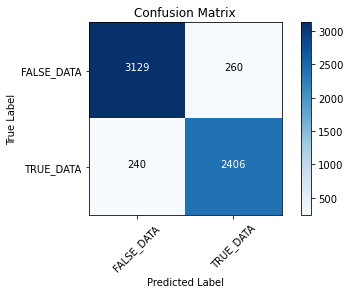

In [36]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score : ", score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FALSE_DATA', 'TRUE_DATA'])

#### Metrics for TFIDFVectorizer

Accuracy Score :  0.9146644573322287
Confusion matrix without normalization


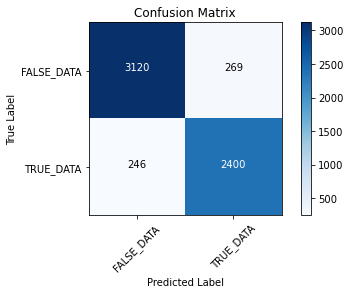

In [37]:
linear_clf.fit(X_train_tf, y_train_tf)
pred = linear_clf.predict(X_test_tf)
score = metrics.accuracy_score(y_test_tf, pred)
print("Accuracy Score : ", score)
cm = metrics.confusion_matrix(y_test_tf, pred)
plot_confusion_matrix(cm, classes = ['FALSE_DATA', 'TRUE_DATA'])

### MultinomialNB Classifier with Hyper Parameter

In [38]:
classifier = MultinomialNB(alpha=0.1)

#### Metrics for Count Vectorizer

In [39]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
        print("Alpha : {}, Score :{}".format(alpha, score))

C:\Users\Vaish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha : 0.0, Score :0.8899751449875725
Alpha : 0.1, Score :0.9019055509527755
Alpha : 0.2, Score :0.9020712510356255
Alpha : 0.30000000000000004, Score :0.9022369511184756
Alpha : 0.4, Score :0.9012427506213753
Alpha : 0.5, Score :0.9009113504556753
Alpha : 0.6000000000000001, Score :0.9009113504556753
Alpha : 0.7000000000000001, Score :0.9014084507042254
Alpha : 0.8, Score :0.9004142502071251
Alpha : 0.9, Score :0.9007456503728252


In [40]:
feature_names = cv.get_feature_names()

In [41]:
classifier.coef_[0]

array([ -9.10052551,  -8.62289795,  -9.10052551, ..., -10.79512123,
        -8.91480836,  -9.32878416])

In [42]:
#Top Real Words
sorted(zip(classifier.coef_[0], feature_names), reverse = True)[:100]

[(-4.000285827751641, 'trump'),
 (-4.288009365590197, 'hillari'),
 (-4.396526292208175, 'clinton'),
 (-4.900106397355391, 'elect'),
 (-5.176735272044412, 'new'),
 (-5.234867037495423, 'comment'),
 (-5.274104852120287, 'video'),
 (-5.386953439264667, 'war'),
 (-5.39695852522563, 'us'),
 (-5.412156386135061, 'hillari clinton'),
 (-5.417274104572042, 'fbi'),
 (-5.480821155688736, 'vote'),
 (-5.566392147002061, 'email'),
 (-5.578375513889157, 'world'),
 (-5.634152051346569, 'obama'),
 (-5.73463812691956, 'donald'),
 (-5.7632319262863, 'donald trump'),
 (-5.7852269478718465, 'russia'),
 (-5.846361336365215, 'day'),
 (-5.862247293954025, 'america'),
 (-5.903102649052088, 'presid'),
 (-5.903102649052088, 'break'),
 (-5.903102649052088, 'american'),
 (-5.919923903542231, 'say'),
 (-5.981131816729235, 'state'),
 (-6.075630783725993, 'campaign'),
 (-6.085591025431048, 'wikileak'),
 (-6.085591025431048, 'get'),
 (-6.116081192188836, 'call'),
 (-6.136937005469674, 'investig'),
 (-6.158237065265763

In [43]:
#Top Fake Words
sorted(zip(classifier.coef_[0], feature_names), reverse = False)[:100]

[(-10.795121226743383, 'abe'),
 (-10.795121226743383, 'abroad'),
 (-10.795121226743383, 'abus new'),
 (-10.795121226743383, 'abus new york'),
 (-10.795121226743383, 'act new'),
 (-10.795121226743383, 'act new york'),
 (-10.795121226743383, 'advic'),
 (-10.795121226743383, 'advis new'),
 (-10.795121226743383, 'advis new york'),
 (-10.795121226743383, 'afford care'),
 (-10.795121226743383, 'age new'),
 (-10.795121226743383, 'age new york'),
 (-10.795121226743383, 'agenda breitbart'),
 (-10.795121226743383, 'ail'),
 (-10.795121226743383, 'airbag'),
 (-10.795121226743383, 'aleppo new'),
 (-10.795121226743383, 'aleppo new york'),
 (-10.795121226743383, 'ali'),
 (-10.795121226743383, 'america breitbart'),
 (-10.795121226743383, 'america new york'),
 (-10.795121226743383, 'ami'),
 (-10.795121226743383, 'ami schumer'),
 (-10.795121226743383, 'amp'),
 (-10.795121226743383, 'ann'),
 (-10.795121226743383, 'ann coulter'),
 (-10.795121226743383, 'announc new'),
 (-10.795121226743383, 'answer new'),

#### Metrics for TFIDFVectorizer

In [44]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train_tf, y_train_tf)
    y_pred = sub_classifier.predict(X_test_tf)
    score = metrics.accuracy_score(y_test_tf, y_pred)
    if score > previous_score:
        classifier = sub_classifier
        print("Alpha : {}, Score :{}".format(alpha, score))

C:\Users\Vaish\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha : 0.0, Score :0.8651201325600663
Alpha : 0.1, Score :0.8762220381110191
Alpha : 0.2, Score :0.8790389395194698
Alpha : 0.30000000000000004, Score :0.87970173985087
Alpha : 0.4, Score :0.8805302402651202
Alpha : 0.5, Score :0.8790389395194698
Alpha : 0.6000000000000001, Score :0.8808616404308203
Alpha : 0.7000000000000001, Score :0.8810273405136703
Alpha : 0.8, Score :0.8801988400994201
Alpha : 0.9, Score :0.8801988400994201


In [45]:
feature_names = tf.get_feature_names()

In [46]:
classifier.coef_[0]

array([-8.79766575, -8.5041003 , -8.86767585, ..., -9.89991495,
       -8.39167253, -9.10025968])

In [47]:
# Top Real Words
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:100]

[(-4.953150706318684, 'hillari'),
 (-4.986348069689684, 'trump'),
 (-5.094614798457189, 'clinton'),
 (-5.406277167478237, 'elect'),
 (-5.724590825722194, 'video'),
 (-5.7781425579727905, 'comment'),
 (-5.795765983698452, 'war'),
 (-5.817324982717006, 'us'),
 (-5.882192573142294, 'hillari clinton'),
 (-5.887167018439244, 'fbi'),
 (-5.934056709651774, 'vote'),
 (-5.949361891326303, 'world'),
 (-6.045026170238876, 'email'),
 (-6.130249148271787, 'obama'),
 (-6.145135000345336, 'america'),
 (-6.166840934103437, 'russia'),
 (-6.211502555126467, 'american'),
 (-6.2355210920367625, 'day'),
 (-6.2949394625737956, 'break'),
 (-6.2987025170459905, 'presid'),
 (-6.317592895548353, 'donald'),
 (-6.352109415482579, 'donald trump'),
 (-6.359646562466765, 'wikileak'),
 (-6.419087425810549, 'state'),
 (-6.424458884382423, 'de'),
 (-6.45113479726357, 'say'),
 (-6.484471186008497, 'make'),
 (-6.495925750480803, 'get'),
 (-6.500041693029704, 'win'),
 (-6.507861521469314, 'campaign'),
 (-6.517321150292128

In [48]:
# Top fake words
sorted(zip(classifier.coef_[0], feature_names), reverse=False)[:100]

[(-9.899914946048192, 'abe'),
 (-9.899914946048192, 'abroad'),
 (-9.899914946048192, 'abus new'),
 (-9.899914946048192, 'abus new york'),
 (-9.899914946048192, 'act new'),
 (-9.899914946048192, 'act new york'),
 (-9.899914946048192, 'advic'),
 (-9.899914946048192, 'advis new'),
 (-9.899914946048192, 'advis new york'),
 (-9.899914946048192, 'afford care'),
 (-9.899914946048192, 'age new'),
 (-9.899914946048192, 'age new york'),
 (-9.899914946048192, 'agenda breitbart'),
 (-9.899914946048192, 'ail'),
 (-9.899914946048192, 'airbag'),
 (-9.899914946048192, 'aleppo new'),
 (-9.899914946048192, 'aleppo new york'),
 (-9.899914946048192, 'ali'),
 (-9.899914946048192, 'america breitbart'),
 (-9.899914946048192, 'america new york'),
 (-9.899914946048192, 'ami'),
 (-9.899914946048192, 'ami schumer'),
 (-9.899914946048192, 'amp'),
 (-9.899914946048192, 'ann'),
 (-9.899914946048192, 'ann coulter'),
 (-9.899914946048192, 'announc new'),
 (-9.899914946048192, 'answer new'),
 (-9.899914946048192, 'ant

### HashingVectorizer

In [49]:
hs_vectorizer = HashingVectorizer(n_features=5000, alternate_sign= False)
X_hs = hs_vectorizer.fit_transform(corpus).toarray()

In [50]:
y_hs = y

In [51]:
X_hs.shape

(18285, 5000)

In [52]:
y_hs.shape

(18285,)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train_hs, X_test_hs, y_train_hs, y_test_hs = train_test_split(X_hs, y_hs, test_size=0.37, random_state=0)

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
classifier = MultinomialNB()

In [57]:
classifier.fit(X_train_hs, y_train_hs)

MultinomialNB()

In [58]:
predict_hs = classifier.predict(X_test_hs)

In [59]:
accuracy = metrics.accuracy_score(y_test_hs, predict_hs)

In [60]:
print("Accuracy : ", accuracy)

Accuracy :  0.8684599467927875


In [61]:
confusion_matrix = metrics.confusion_matrix(y_test_hs, predict_hs)

Confusion matrix without normalization


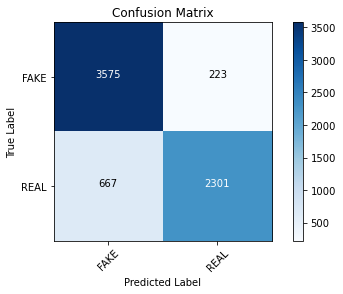

In [62]:
plot_confusion_matrix(confusion_matrix, classes = ['FAKE', 'REAL'])

### Test Data Submit

In [63]:
df_test = pd.read_csv("fake-news/test.csv")

In [64]:
df_test.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


In [65]:
df_test = df_test.dropna()

In [66]:
df_test = df_test.reset_index()

In [67]:
df_test.head(10)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
5,7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
6,10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...
7,11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ..."
8,12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...
9,13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...


In [68]:
test_corpus=[]
for i in range(0,len(df_test)):
    review = re.sub('[^a-zA-z]', ' ', df_test['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    test_corpus.append(review)

In [69]:
X_test = tf.fit_transform(test_corpus).toarray()

In [70]:
predictions = linear_clf.predict(X_test)

In [76]:
predictions

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [78]:
predictions = pd.DataFrame(np.array(predictions).T)

In [79]:
predictions.head(10)

,0
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [89]:
predictions = predictions.rename(columns={0 : 'label'})

In [90]:
predictions.head(10)

,label
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [93]:
submit = pd.concat([df_test, predictions], axis = 1, join='inner', sort=False )

In [95]:
submit.drop(columns=['index'], axis=1, inplace=True)

In [96]:
submit.head(10)

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,1
2,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",0
3,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1
5,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...,0
6,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...,1
7,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ...",1
8,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...,1
9,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...,1


In [97]:
submit.to_csv("fake-news/submit.csv")